In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [51]:
df = pd.read_csv("processedData.csv")
df.columns


Index(['Unnamed: 0', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'DelinquenciesLast7Years', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPay

In [52]:
df=df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113912 entries, 0 to 113911
Data columns (total 50 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         113912 non-null  int64  
 1   Term                                113912 non-null  int64  
 2   LoanStatus                          113912 non-null  int64  
 3   BorrowerAPR                         113912 non-null  float64
 4   BorrowerRate                        113912 non-null  float64
 5   LenderYield                         113912 non-null  float64
 6   EstimatedEffectiveYield             113912 non-null  float64
 7   EstimatedLoss                       113912 non-null  float64
 8   EstimatedReturn                     113912 non-null  float64
 9   ProsperRating (numeric)             113912 non-null  float64
 10  ProsperRating (Alpha)               113912 non-null  int64  
 11  ProsperScore              

In [53]:
X = df.drop(['LoanStatus'],axis=1)
y = df['LoanStatus']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113912 entries, 0 to 113911
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         113912 non-null  int64  
 1   Term                                113912 non-null  int64  
 2   BorrowerAPR                         113912 non-null  float64
 3   BorrowerRate                        113912 non-null  float64
 4   LenderYield                         113912 non-null  float64
 5   EstimatedEffectiveYield             113912 non-null  float64
 6   EstimatedLoss                       113912 non-null  float64
 7   EstimatedReturn                     113912 non-null  float64
 8   ProsperRating (numeric)             113912 non-null  float64
 9   ProsperRating (Alpha)               113912 non-null  int64  
 10  ProsperScore                        113912 non-null  float64
 11  ListingCategory (numeric) 

# Mutual Information

In [54]:
X.dtypes

CreditGrade                             int64
Term                                    int64
BorrowerAPR                           float64
BorrowerRate                          float64
LenderYield                           float64
EstimatedEffectiveYield               float64
EstimatedLoss                         float64
EstimatedReturn                       float64
ProsperRating (numeric)               float64
ProsperRating (Alpha)                   int64
ProsperScore                          float64
ListingCategory (numeric)               int64
Occupation                              int64
EmploymentStatus                        int64
EmploymentStatusDuration              float64
IsBorrowerHomeowner                     int64
CurrentlyInGroup                        int64
CreditScoreRangeLower                 float64
CreditScoreRangeUpper                 float64
CurrentCreditLines                    float64
OpenCreditLines                       float64
TotalCreditLinespast7years        

In [55]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=X.dtypes == int, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores.sort_values(ascending=False)

LP_GrossPrincipalLoss                 0.345433
LP_NetPrincipalLoss                   0.333414
LoanMonthsSinceOrigination            0.093460
BorrowerAPR                           0.091573
EstimatedEffectiveYield               0.090379
EstimatedReturn                       0.089798
EstimatedLoss                         0.085730
BorrowerRate                          0.083163
LP_CustomerPrincipalPayments          0.082178
LenderYield                           0.078602
ProsperRating (numeric)               0.068211
MonthlyLoanPayment                    0.062471
ProsperScore                          0.058019
LP_CustomerPayments                   0.051361
EmploymentStatus                      0.049353
CreditGrade                           0.043775
ListingCategory (numeric)             0.041589
ProsperRating (Alpha)                 0.037210
CreditScoreRangeLower                 0.036916
Investors                             0.034932
CreditScoreRangeUpper                 0.034436
AvailableBank

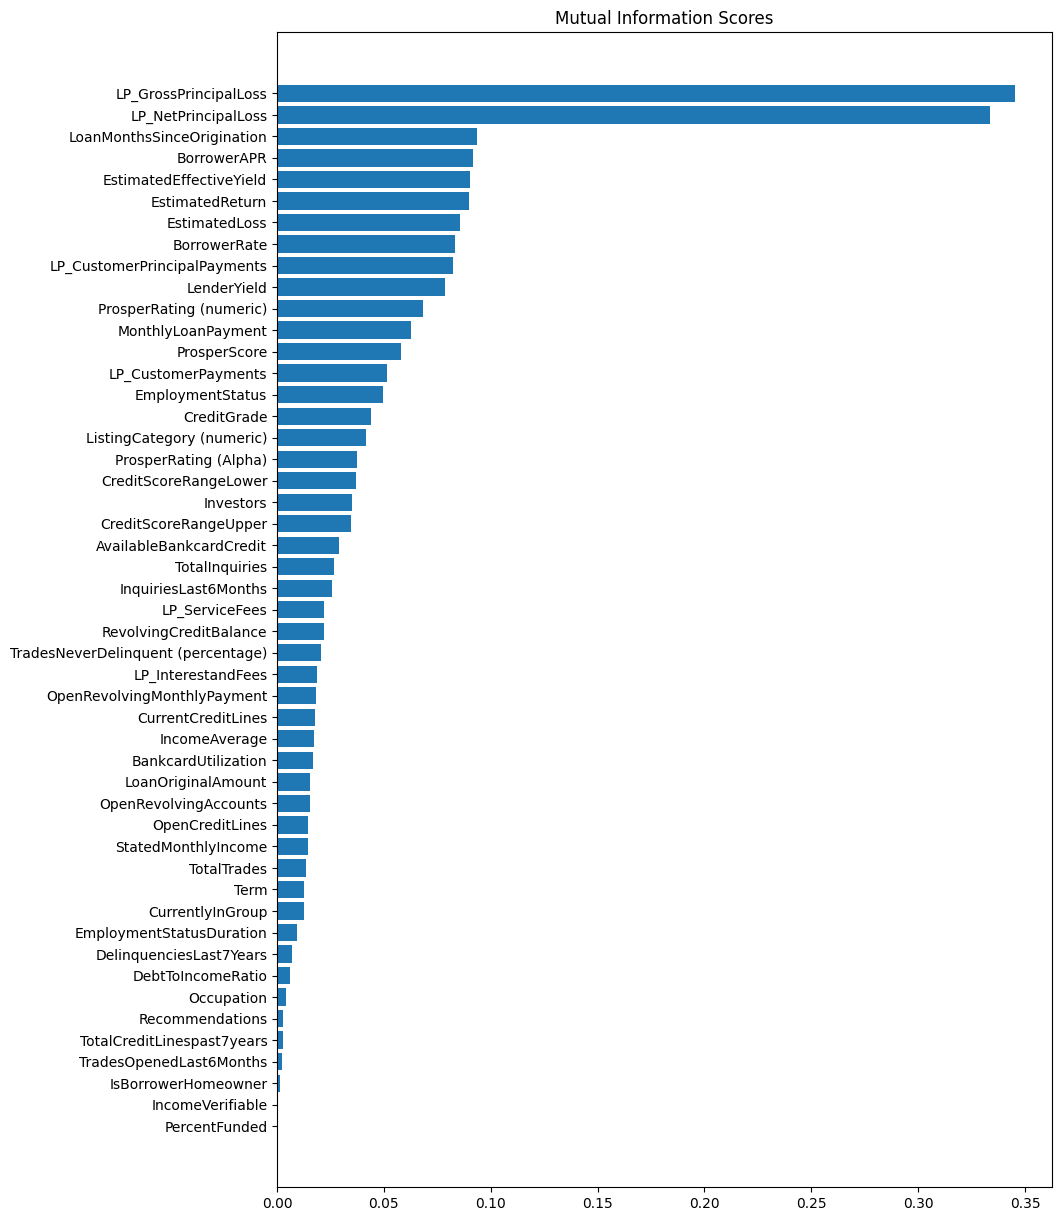

In [56]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 15))
plot_mi_scores(mi_scores.sort_values(ascending=False))

In [57]:
# feature selection
selected_features = X.drop(X.columns[mi_scores < 0.04],axis=1)
selected_features


,CreditGrade,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatus,LoanMonthsSinceOrigination,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LP_NetPrincipalLoss
0,3,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,0,7,78.0,330.43,11396.14000,9248.80,0.0,0.0
1,3,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,7.000000,2,0,0.0,318.93,0.00000,0.00,0.0,0.0
2,6,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,0,2,86.0,123.32,4186.63000,3001.00,0.0,0.0
3,3,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,9.000000,16,0,16.0,321.45,5143.20000,4091.09,0.0,0.0
4,3,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,4.000000,2,0,6.0,563.97,2819.85000,1563.22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113907,3,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,5.000000,1,0,11.0,364.74,3647.40000,2238.38,0.0,0.0
113908,3,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,8.000000,7,0,28.0,65.57,2330.55000,1997.16,0.0,0.0
113909,3,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,3.000000,1,0,3.0,273.35,546.70000,183.15,0.0,0.0
113910,3,0.28408,0.2605,0.2505,0.244500,0.085000,0.151420,4.000000,5.000000,2,1,28.0,449.55,12363.13625,9248.80,0.0,0.0


In [58]:
selected_features.shape

(113912, 17)

In [59]:
# normalization
selected_features = (selected_features - selected_features.min()) / (selected_features.max() - selected_features.min())

# PCA

In [68]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(selected_features)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.241808,1.085726,0.473243,0.591509,0.185860,-0.011475,-0.158233,0.007702,0.033356,-0.031091,-0.087319,0.051248,-0.016908,-0.001865,-0.004618,-0.000222,0.016594
1,0.701684,-0.678378,-0.084255,0.031345,-0.054143,-0.083844,-0.024457,0.043225,-0.002933,0.024527,0.014768,0.003463,0.006107,0.008846,0.002269,0.000001,-0.000118
2,-0.179269,0.239739,0.533281,-0.179135,-0.141438,0.228210,-0.180147,0.332746,-0.046711,-0.101306,-0.083574,0.024034,0.000711,0.002570,0.006464,-0.000421,0.035955
3,0.837835,-0.101715,-0.207189,-0.197029,0.580291,0.022572,0.272942,0.193549,0.062336,-0.007092,-0.031340,0.009362,0.007290,0.024416,0.000490,-0.000031,-0.000060
4,-0.185388,-0.178588,-0.419973,0.221878,-0.226607,-0.029321,0.110284,0.102964,0.069878,-0.112561,0.020679,0.042606,0.003184,0.055639,0.001225,-0.000147,-0.000300
